In [382]:
import pandas  as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import array

In [383]:
class District:
    district_name = str()
    rural_p = int()
    urban_p = int()
    p_density = int()
    no_PHC = int()                 #No. of PHC under this district 
    rate = int()                   #No. of vials used per day 
    frequency_in = int()           #Input frequency
    frequency_out = int()          #Output frequency
    wastage_PHC = int ()           #pertentage
    Storage_Capacity = int ()
    Storage_Capacity_rural = int ()
    Storage_Capacity_urban = int ()
    Investment_Cost = int()
    workforce_urban = int()         # 2 member team
    workforce_rural = int()         # 6 memebr team

    def no_workforce_storage_Capacity(self,n):
        f_u = 15      #assumption
        f_r = 30      #assumption
        f_d = 30      #assumption
        self.workforce_urban = self.urban_p/(n*320)
        self.workforce_rural = self.rural_p/(n*320)
        self.Storage_Capacity_rural = f_r * (self.rural_p/(n*10))
        self.Storage_Capacity_urban = f_u * (self.urban_p/(n*10))
        self.Storage_Capacity = f_d * (self.urban_p/(n*10)) + f_d * (self.rural_p/(n*10))

class Regional:
   reg_name = list()
   districts = list()
   no_districts = int ()
   frequency_in = int()           #Input frequency
   frequency_out = int()          #Output frequency
   wastage_district = int ()
   Storage_Capacity = int ()
   Investment_Cost = int ()
    

class State:
    State_name = str()
    RVS = list()
    no_RVS = int ()
    no_districts = int ()
    frequency_in = int()           #Input frequency
    frequency_out = int()          #Output frequency
    wastage_Regional = int ()
    workforce_urban = int()         # 2 member team
    workforce_rural = int()         # 6 memebr team
    Storage_Capacity = int ()
    Investment_Cost = int ()

    def __init__(self,loc,n):
        self.districts=list()
        db = pd.read_excel(loc)
        for ind in db.index:
            x = District()
            x.rural_p = db['Rural'][ind]
            x.urban_p = db['Urban'][ind]
            x.district_name = db['District'][ind]
            x.no_workforce_storage_Capacity(n)
            self.workforce_rural += x.workforce_rural
            self.workforce_urban += x.workforce_urban
            self.Storage_Capacity += 0.5*1.2*x.Storage_Capacity
            self.districts.append(x)


In [384]:
N = np.arange(150,370,10)
gujarat=list()

SSC = list()
SWU = list()
SWR = list()
SWT = list()

DST = list()
DSU = list()
DSR = list()
DWU = list()
DWR = list()

for n in N:
    gujarat.append(State('data/gujarat.xlsx',n))
    SSC.append(gujarat[-1].Storage_Capacity*1e-3)
    
    SWR.append(gujarat[-1].workforce_rural)
    SWU.append(gujarat[-1].workforce_urban)
    SWT.append(gujarat[-1].workforce_rural+gujarat[-1].workforce_urban)

    DST.append(gujarat[-1].districts[4].Storage_Capacity*1e-3)
    DSR.append(gujarat[-1].districts[4].Storage_Capacity_rural*1e-3)
    DSU.append(gujarat[-1].districts[4].Storage_Capacity_urban*1e-3)
    
    DWR.append(gujarat[-1].districts[4].workforce_rural)
    DWU.append(gujarat[-1].districts[4].workforce_urban)

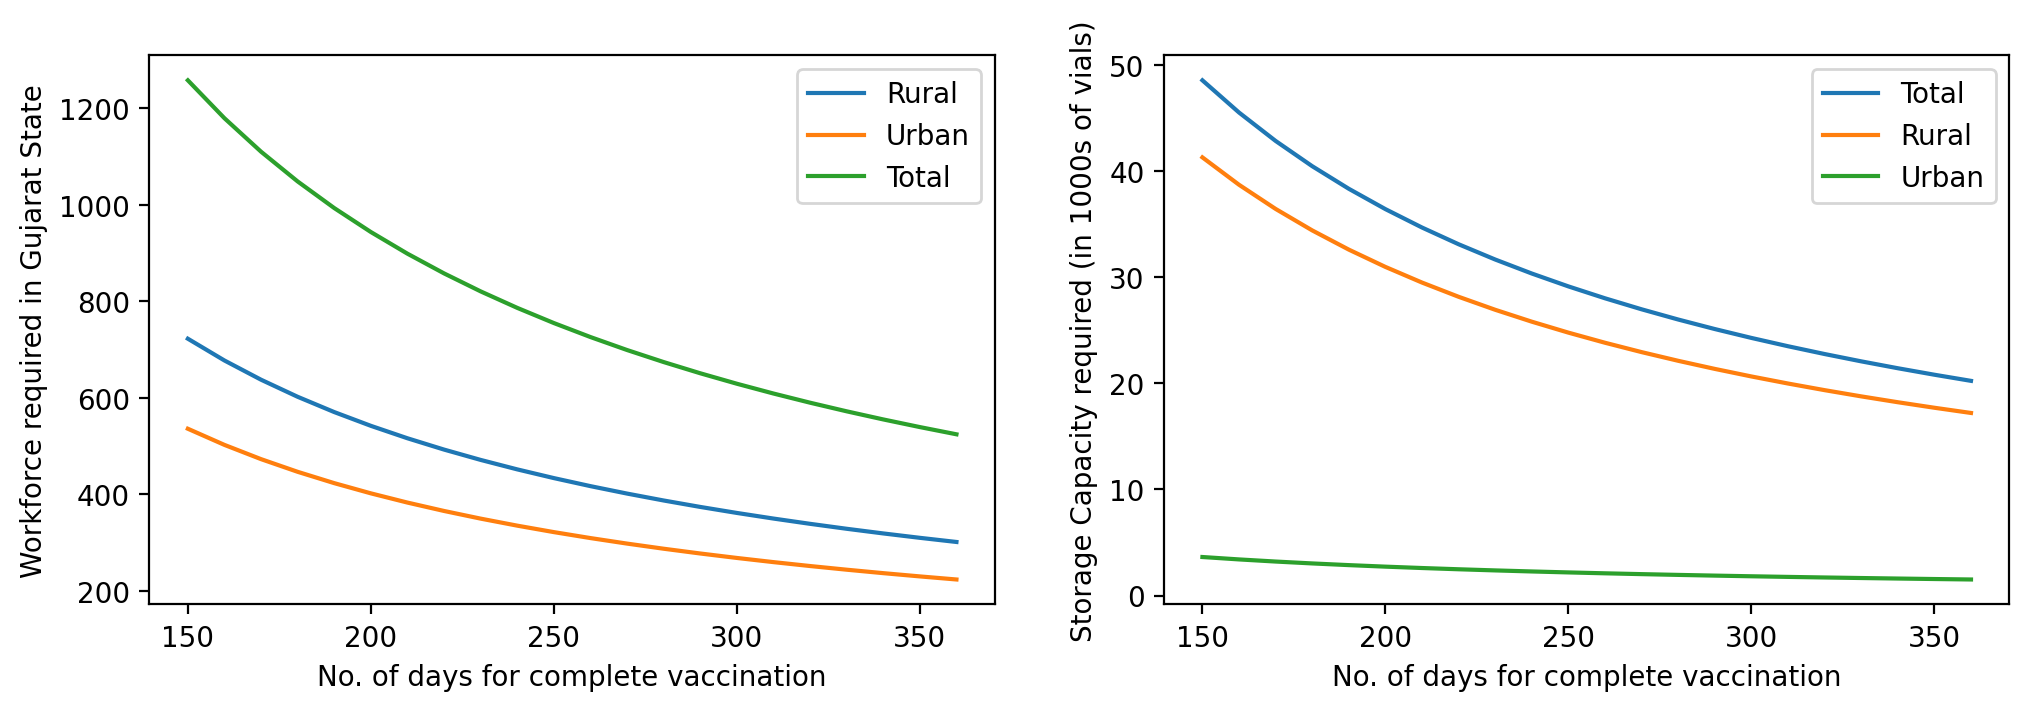

In [385]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

# plt.subplot(2,2,1)
# plt.plot(N, SSC,label='Gujarat')
# plt.xlabel('No. of days for complete vaccination')
# plt.ylabel('Storage Capacity required (in 1000s of vials)')
# plt.legend()

plt.subplot(2,2,1)
plt.plot(N, SWR,label='Rural')
plt.plot(N, SWU,label='Urban')
plt.plot(N, SWT,label='Total')
plt.xlabel('No. of days for complete vaccination')
plt.ylabel('Workforce required in Gujarat State')
plt.legend()

plt.subplot(2,2,2)
plt.plot(N, DST, label='Total')
plt.plot(N, DSR, label='Rural')
plt.plot(N, DSU, label='Urban')
plt.xlabel('No. of days for complete vaccination')
plt.ylabel('Storage Capacity required (in 1000s of vials)')
#plt.title('Storage capacity for ahmedabad district')
plt.legend()


# plt.subplot(2,2,4)
# plt.plot(N, DWR,label='Rural')
# plt.plot(N, DWU,label='Urban')
# plt.xlabel('No. of days for complete vaccination')
# plt.ylabel('Workforce required in kacch District')
# plt.legend()

# plt.subplot(3,2,5)
# plt.plot(DWU,DSC)
# plt.xlabel('No. of days for complete vaccination')
# plt.ylabel('Workforce required in Gujarat State')
# plt.legend()

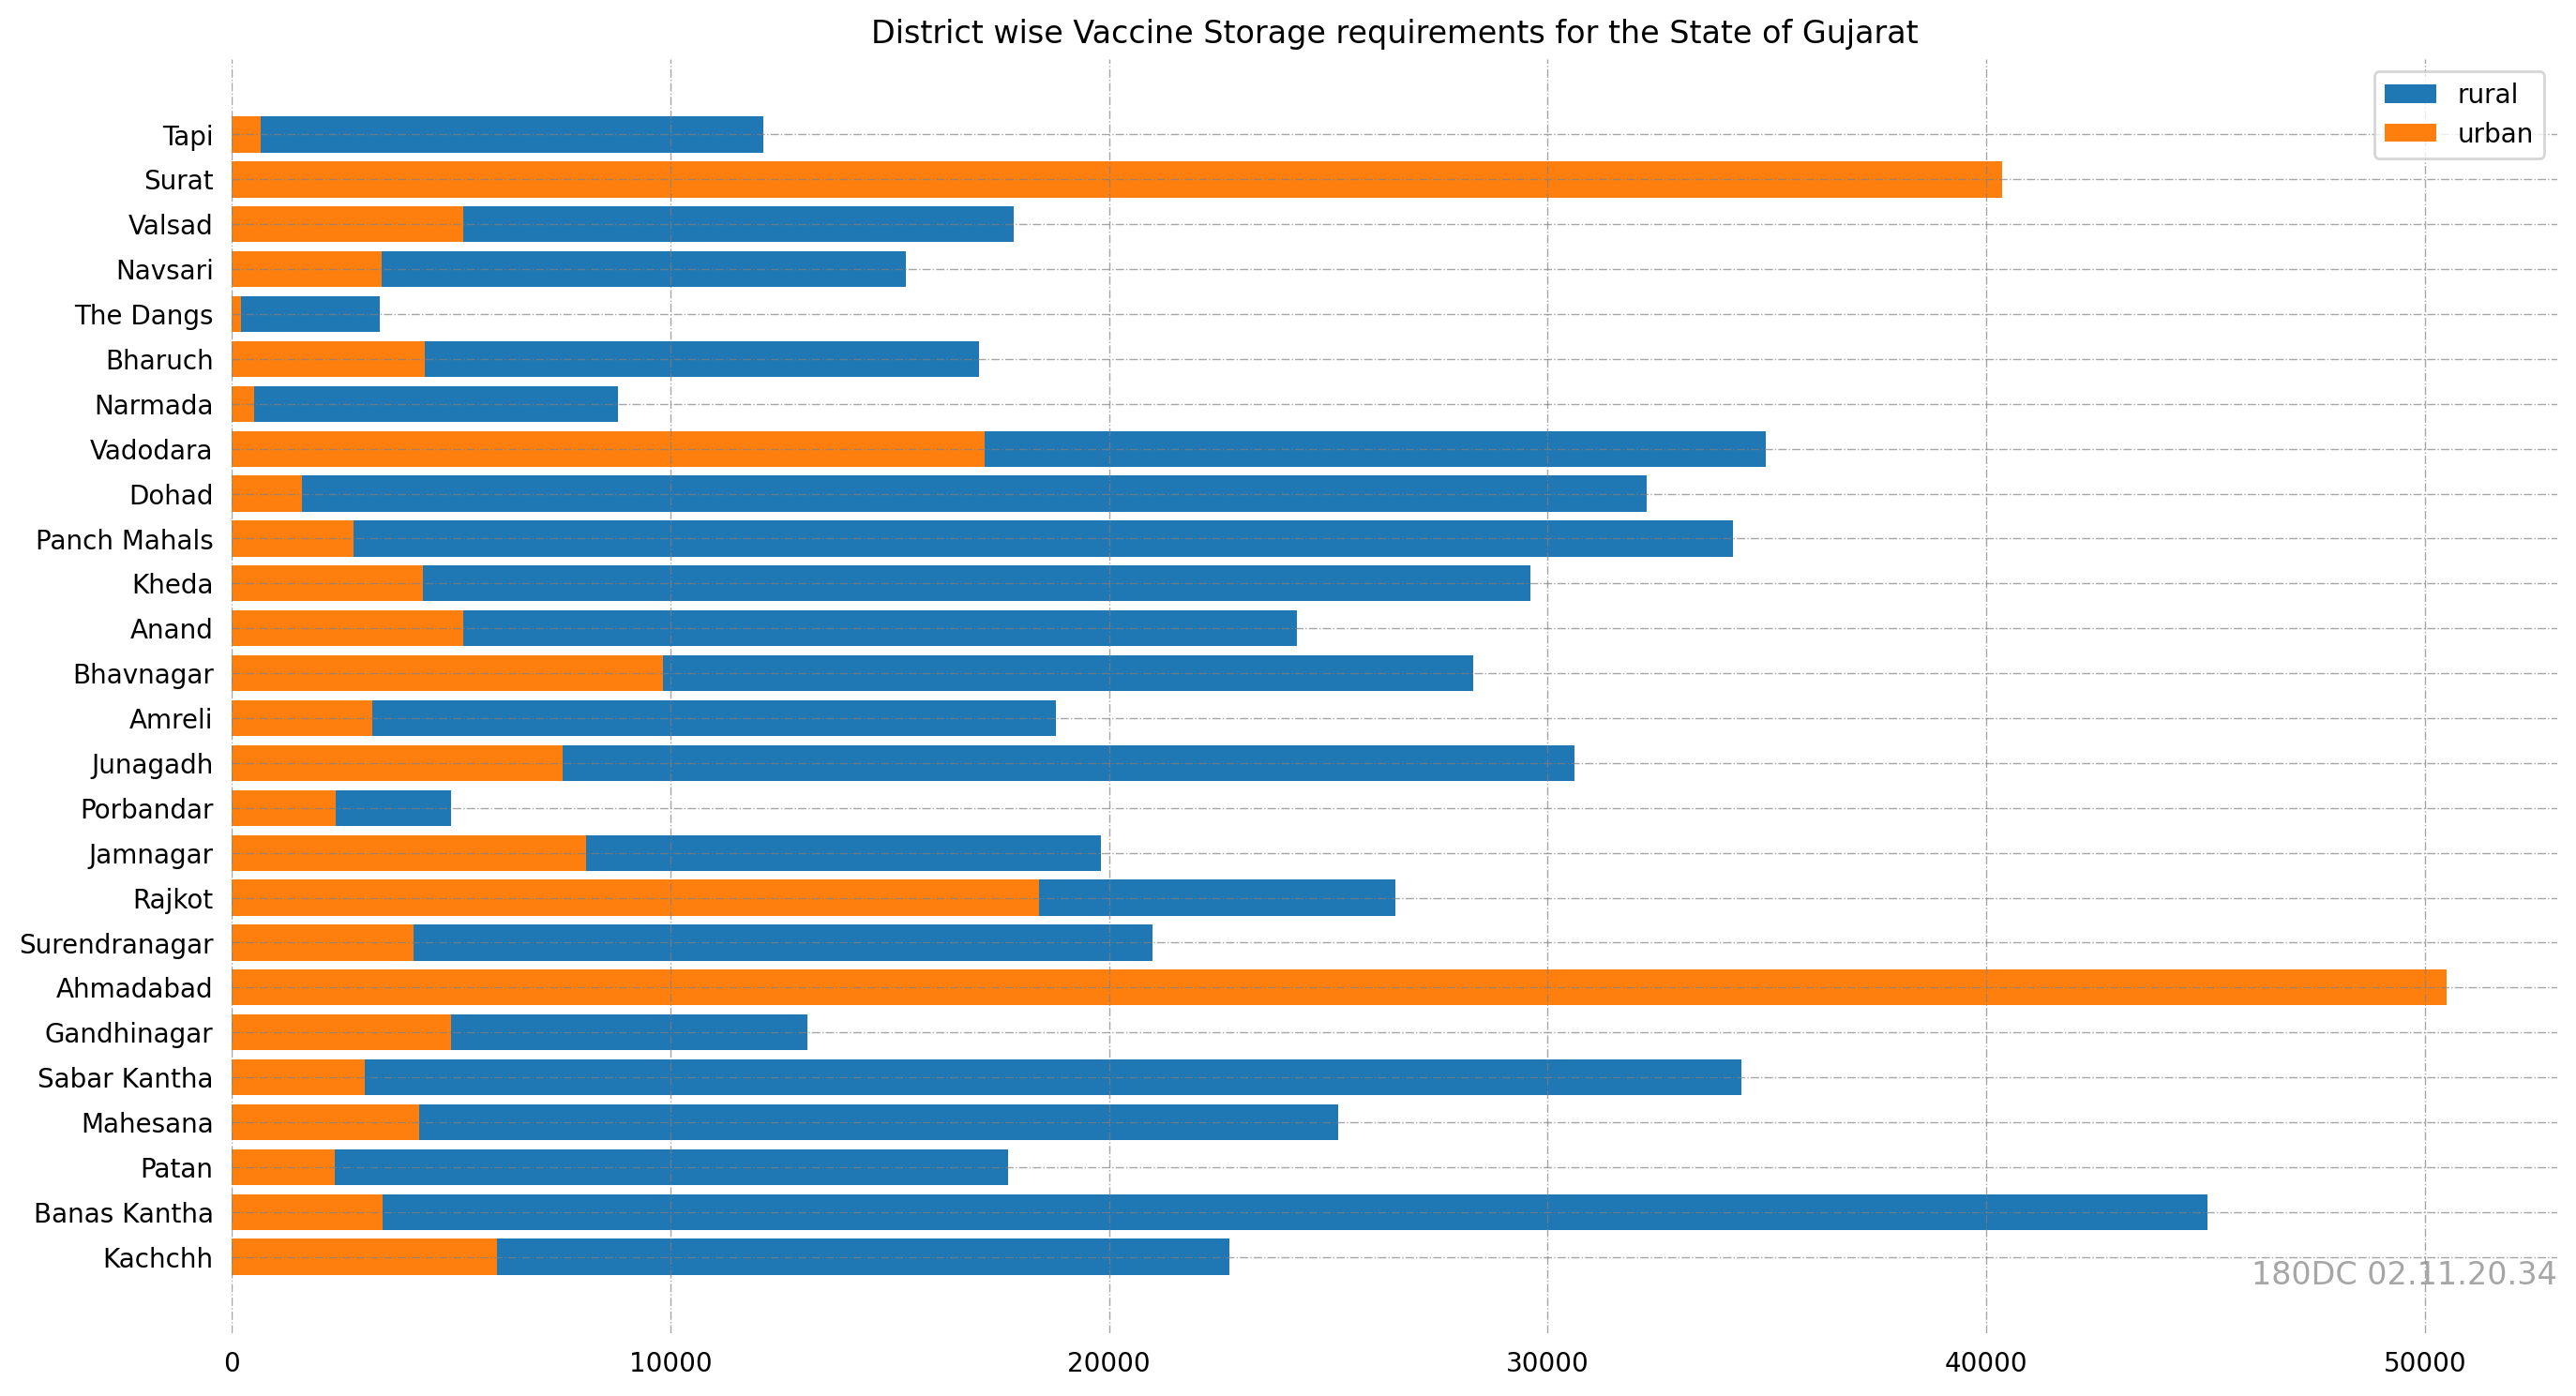

In [386]:
n = 180
gujarat = State('data/gujarat.xlsx',n)

states = list()
rural = list()
urban = list()
total = list()

for district in gujarat.districts:
    states.append(district.district_name)
    rural.append(district.Storage_Capacity_rural)
    urban.append(district.Storage_Capacity_urban)
    total.append(district.Storage_Capacity_urban)

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 

p1 = ax.barh( states, rural, label="rural storages")
p2 = ax.barh( states, urban, label="urban storages") 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')

# Add x, y gridlines 
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.7) 

# # Add annotation to bars 
# for i in ax.patches: 
#     plt.text(i.get_width()+0.5, i.get_y()+0.2,  
#              str(round((i.get_width()), 2)), 
#              fontsize = 10, fontweight ='bold') 

# Add Plot Title 
ax.set_title('District wise Vaccine Storage requirements for the State of Gujarat') 

# Add Text watermark 
fig.text(0.9, 0.15, '180DC 02.11.20.34', fontsize = 12, color ='grey', ha ='right', va ='bottom', alpha = 0.7) 

# Show Plot 
plt.legend()